In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv("./digit-recognizer/train.csv")
train_data = pd.DataFrame(train_data)
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
train_data.isnull().sum()


label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [5]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = train_data.drop(columns=["label"])  # Features (Pixel values)
y = train_data["label"]  # Labels (Digits 0-9)

In [7]:
X = X / 255.0  # Scale pixel values between 0 and 1


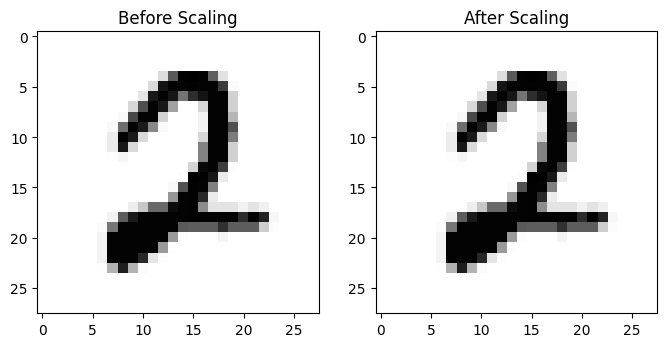

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Select a random digit
index = np.random.randint(0, len(X))  
digit = X.iloc[index].values.reshape(28, 28) * 255  # Convert scaled values back to original range
original_digit = train_data.drop(columns=["label"]).iloc[index].values.reshape(28, 28)  

# Plot before and after scaling
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(original_digit, cmap='Grays')
axes[0].set_title("Before Scaling")
axes[1].imshow(digit, cmap='Grays')
axes[1].set_title("After Scaling")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

X_train ,X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras

# Simple Neural Network
model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1050/1050 [==============================] - 27s 23ms/step - loss: 0.3007 - accuracy: 0.9139 - val_loss: 0.1618 - val_accuracy: 0.9526
Epoch 2/10
1050/1050 [==============================] - 21s 20ms/step - loss: 0.1262 - accuracy: 0.9629 - val_loss: 0.1539 - val_accuracy: 0.9495
Epoch 3/10
1050/1050 [==============================] - 30s 29ms/step - loss: 0.0863 - accuracy: 0.9738 - val_loss: 0.1249 - val_accuracy: 0.9613
Epoch 4/10
1050/1050 [==============================] - 34s 32ms/step - loss: 0.0631 - accuracy: 0.9805 - val_loss: 0.1174 - val_accuracy: 0.9650
Epoch 5/10
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0488 - accuracy: 0.9849 - val_loss: 0.1066 - val_accuracy: 0.9698
Epoch 6/10
1050/1050 [==============================] - 12s 12ms/step - loss: 0.0363 - accuracy: 0.9879 - val_loss: 0.1011 - val_accuracy: 0.9705
Epoch 7/10
1050/1050 [==============================] - 12s 12ms/step - loss: 0.0301 - accuracy: 0.9900 - val_loss: 0.1311 -

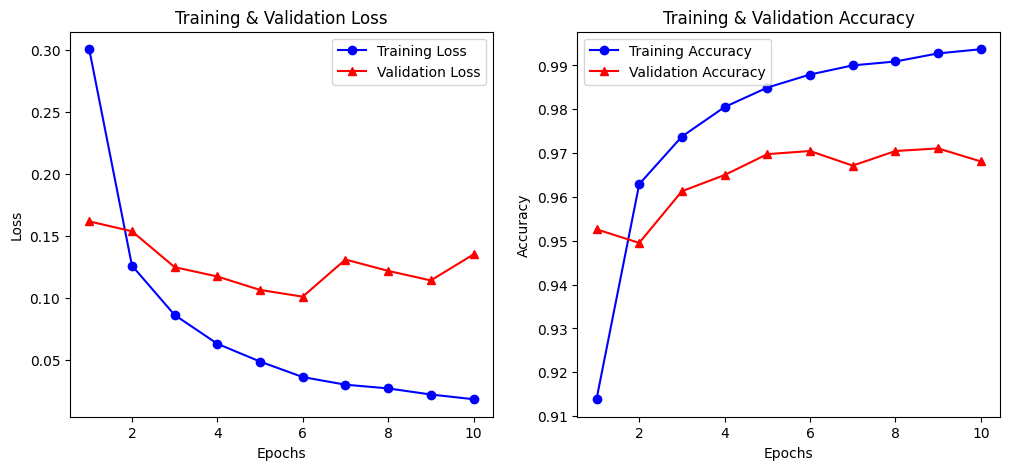

In [12]:
history_dict = history.history

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]

epochs = range(1, len(loss)+1)

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')  # 'bo-' means blue circles
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')  # 'r^-' means red triangles
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r^-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()


In [13]:
val_loss, val_acc= model.evaluate(X_test, Y_test)
print(f"Validation Accuracy:{val_acc:.4f}")

263/263 [==============================] - 2s 6ms/step - loss: 0.1352 - accuracy: 0.9681
Validation Accuracy:0.9681


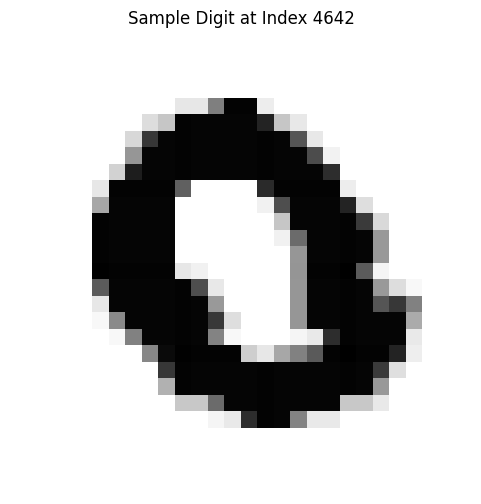

In [ ]:
random_idx = np.random.randint(0, len(X_test))
sample_digit = X_test.iloc[random_idx].values.reshape(1, 784)

sample_digit1 = X_test.iloc[random_idx].values.reshape(28, 28)

figure = plt.figure(figsize=(6, 6))
plt.imshow(sample_digit1, cmap="Grays")
plt.title(f"Sample Digit at Index {random_idx}")
plt.axis("off")
plt.show()

In [16]:
prediction = np.argmax(model.predict(sample_digit))

1/1 [==============================] - 0s 198ms/step


In [17]:
print("Predicted Lable:", prediction)

Predicted Lable: 0
